In [1]:
!pip install spacy

In [2]:
!pip install wordcloud

In [3]:
!pip install textblob

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [7]:
Elon=pd.read_csv("C:/Users/lenovo/Downloads/Elon_musk.csv", sep=',', encoding='latin-1')
Elon 

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
train,test = train_test_split(Elon,test_size=0.1)

In [9]:
train

,Unnamed: 0,Text
193,194,"@cleantechnica To my surprise, Tesla has bette..."
1498,1499,@Erdayastronaut @cnunezimages @SpaceIntellige3...
221,222,@lexfridman @tegmark Tegmark is an exceptional...
103,104,Giga Berlin progress https://t.co/ekpG5qcbUi
860,861,@auchenberg Latency will improve significantly...
...,...,...
1704,1705,@matfabrix @engineers_feed Things we take for ...
1014,1015,@enn_nafnlaus Exactly. He plays the poor inve...
735,736,Case closed https://t.co/pUYiJcAdD6
1241,1242,@teslaownersSV @jgrano305 @soumiksf @ID_AA_Car...


In [10]:
test

,Unnamed: 0,Text
362,363,@Reza_Zadeh Less?
9,10,The most entertaining outcome is the most likely
1025,1026,@Teslarati Great work by SpaceX valve engineer...
1215,1216,@1stPrinciples4L @Gfilche @YahooFinance Yes
1401,1402,@ICannot_Enough People read too much into this...
...,...,...
1858,1859,RT @SpaceX: Videos of yesterdays catch of bot...
1733,1734,@keith31345919 @PPathole https://t.co/0kAAv0DtNn
1925,1926,@teslaownersSV @Kristennetten Sure
150,151,"@NASASpaceflight Unlike its aircraft division,..."


In [11]:
import re

In [12]:
# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [13]:
# Clean The Text
Elon["Text"] = Elon["Text"].apply(cleantext)

In [14]:
Elon.head()

,Unnamed: 0,Text
0,1,Im an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [15]:
from textblob import TextBlob

In [16]:
# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [17]:
# Adding Subjectivity & Polarity
Elon[["subjectivity", "polarity"]] = Elon.apply(sentiment_analysis, axis=1)
Elon

,Unnamed: 0,Text,subjectivity,polarity
0,1,Im an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


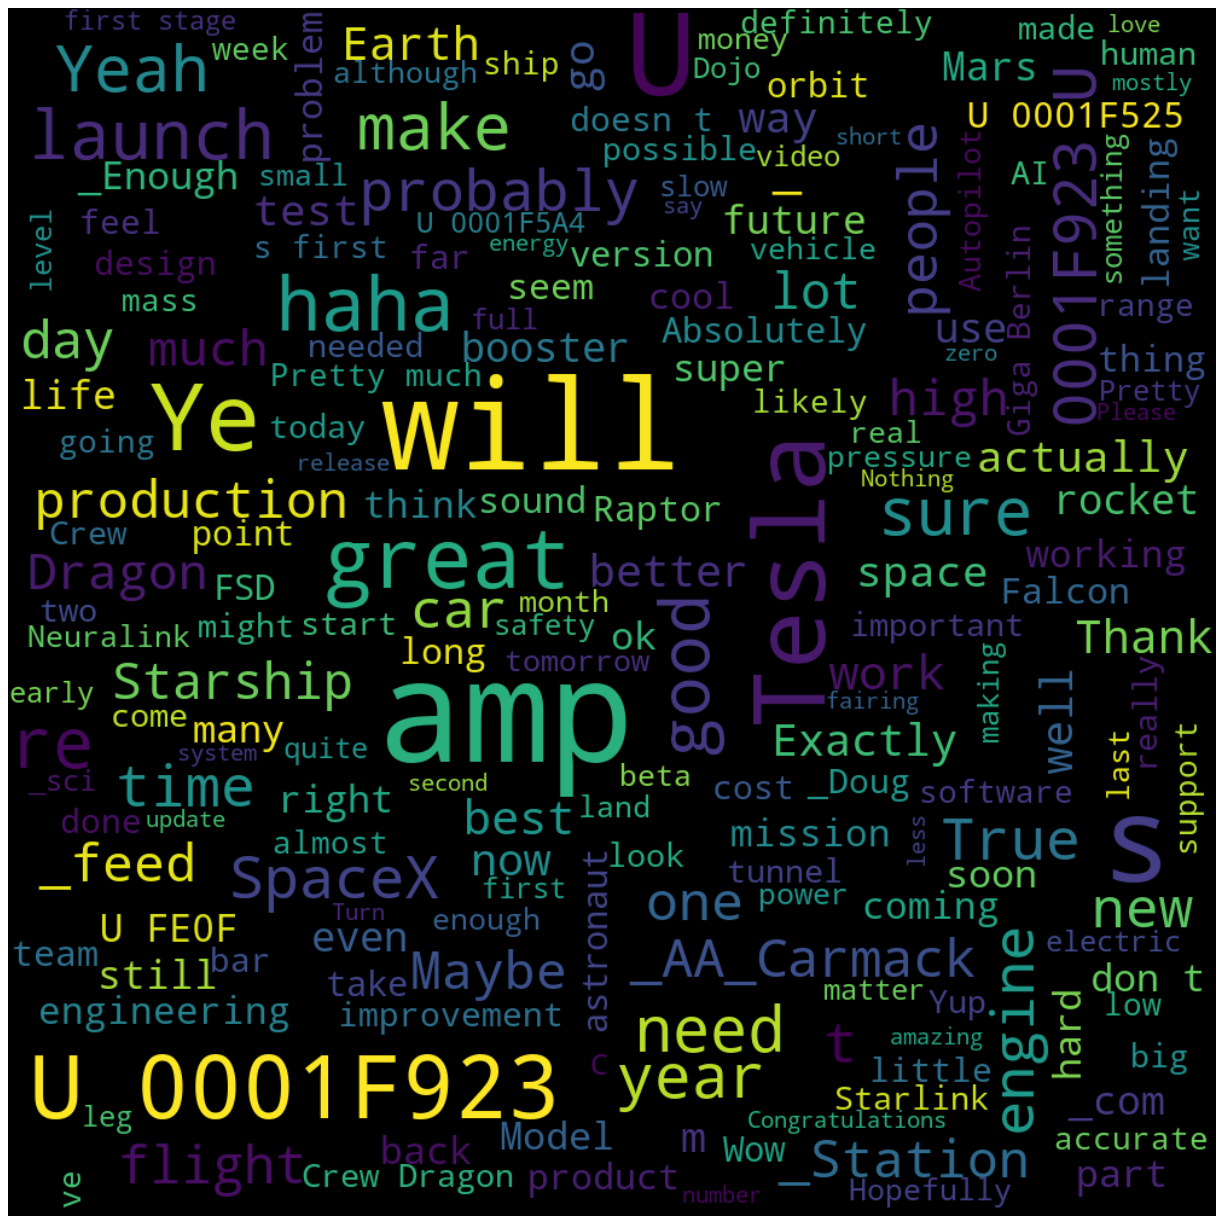

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in Elon["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [19]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
# Create a New Analysis Column
Elon["analysis"] = Elon["polarity"].apply(analysis)

In [21]:
# Print The Data
Elon

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,Im an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [22]:
positive_tweets = Elon[Elon['analysis'] == 'Positive']
negative_tweets = Elon[Elon['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
  print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
  print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - Im an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

Thats what youre missing.


In [23]:
Elon = Elon[['Text','analysis']]
Elon

,Text,analysis
0,Im an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [24]:
Elon = Elon [Elon ['analysis']!= 'Neutral']
Elon

,Text,analysis
0,Im an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [25]:
Elon.shape

(1103, 2)

In [26]:
Elon.dtypes

Text        object
analysis    object
dtype: object

In [27]:
Elon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1103 non-null   object
 1   analysis  1103 non-null   object
dtypes: object(2)
memory usage: 25.9+ KB


In [28]:
# Data Preprocessing

In [29]:
train,test = train_test_split(Elon,test_size=0.1)

In [30]:
train

,Text,analysis
1674,Acquisition of signal expected in 5 mins,Negative
668,Absolutely. Production/testing of rocket e...,Positive
1402,_Enough Critical feedback is always appreciate...,Positive
0,Im an alien,Negative
786,Will be worth it,Positive
...,...,...
489,I still have a soft spot in my heart for tr...,Positive
439,Absolutely. We will release FSD subscription ...,Positive
1041,Meant to say that it should be fixed in the ...,Positive
256,Sure,Positive


In [31]:
test 

,Text,analysis
1197,There are some practical size constraints to...,Positive
25,_ Starlink is a staggeringly difficult techni...,Negative
1603,_com I generally try my best not to be on patents,Positive
949,London to Beijing would be cool,Positive
924,Now that Tesla FSD beta is out in limited rele...,Positive
...,...,...
1322,Try a Tesla &amp; youre welcome to give it b...,Positive
1885,Important to service very high latitudes,Positive
920,"_Ryan Well, we have said many times that the p...",Positive
554,_AA_Carmack Int8 for almost all heavy lifting ...,Positive


In [32]:
for val in train['Text']:
    print (val)

Acquisition of signal expected in 5 mins
    Absolutely. Production/testing of rocket engines is over 90% of 
_Enough Critical feedback is always appreciated btw
 Im an alien
  Will be worth it
 Retail investors like  are remarkably insightful. Also, .
  Releasing private beta in 2 to 4 weeks, public beta (early access owners who opt in 
 New design is better with many minor tweaks. Even the small details matter.
 Pretty much
 Tesla team is working hard on increasing Powerwall production
Great song

  True
  Exactly. This is not fully appreciated.
 True. Also, fewer heart attacks, as way easier to pump blood in 37% gravity.
  Exactly
_heide  What about a heavy duty, paintball machine gun mounted on the bed rails?
   Probably a good one to design &amp; engineer in Germany
Hollywood should just start with the sequel &amp; skip the original, because financials
: Pick up the energetic wallpapers, and charge your everyday adventure! 
  V1.1 legs will be ~60% longer. V2.0 legs will be muc

In [33]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [34]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [35]:
train['Text'][1000]

'  The SoC\x92s sync with each other 20 to 30 times/sec, exchanging output of NNs that should be in\x85 '

In [36]:
def Clean_Text(musk):
    Text = []
    analysis = []
    for index,row in musk.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [37]:
train_Text,train_analysis = Clean_Text(train)

In [38]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['acquisition signal expected 5 min',
  'absolutely. production/testing rocket engine 90%',
  '_enough critical feedback always appreciated btw',
  'i\x92m alien',
  'worth',
  'retail investor like remarkably insightful. also, .',
  'releasing private beta 2 4 weeks, public beta (early access owner opt',
  'new design better many minor tweaks. even small detail matter.',
  'pretty much',
  'tesla team working hard increasing powerwall production',
  'great song',
  'true',
  'exactly. fully appreciated.',
  'true. also, fewer heart attacks, way easier pump blood 37% gravity.',
  'exactly',
  '_heide heavy duty, paintball machine gun mounted bed rails?',
  'probably good one design &amp; engineer germany',
  'hollywood start sequel &amp; skip original, financials',
  ': pick energetic wallpapers, charge everyday adventure!',
  'v1.1 leg ~60% longer. v2.0 leg much wider &amp; taller \x97 like falcon, bu',
  'one best game ever',
  '_feed we\x92re talking. also, stephenson 2-1

In [39]:
processed_data = pd.DataFrame(final_data)

In [40]:
processed_data

,tweets,sentiments
0,acquisition signal expected 5 min,Negative
1,absolutely. production/testing rocket engine 90%,Positive
2,_enough critical feedback always appreciated btw,Positive
3,im alien,Negative
4,worth,Positive
...,...,...
987,still soft spot heart transpiration cooking. t...,Positive
988,absolutely. release fsd subscription early nex...,Positive
989,meant say fixed latest wide release. wont nee...,Positive
990,sure,Positive


In [41]:
# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [43]:
processed_data

,tweets,sentiments
0,acquisition signal expected 5 min,0
1,absolutely. production/testing rocket engine 90%,1
2,_enough critical feedback always appreciated btw,1
3,im alien,0
4,worth,1
...,...,...
987,still soft spot heart transpiration cooking. t...,1
988,absolutely. release fsd subscription early nex...,1
989,meant say fixed latest wide release. wont nee...,1
990,sure,1


In [44]:
# Visualization

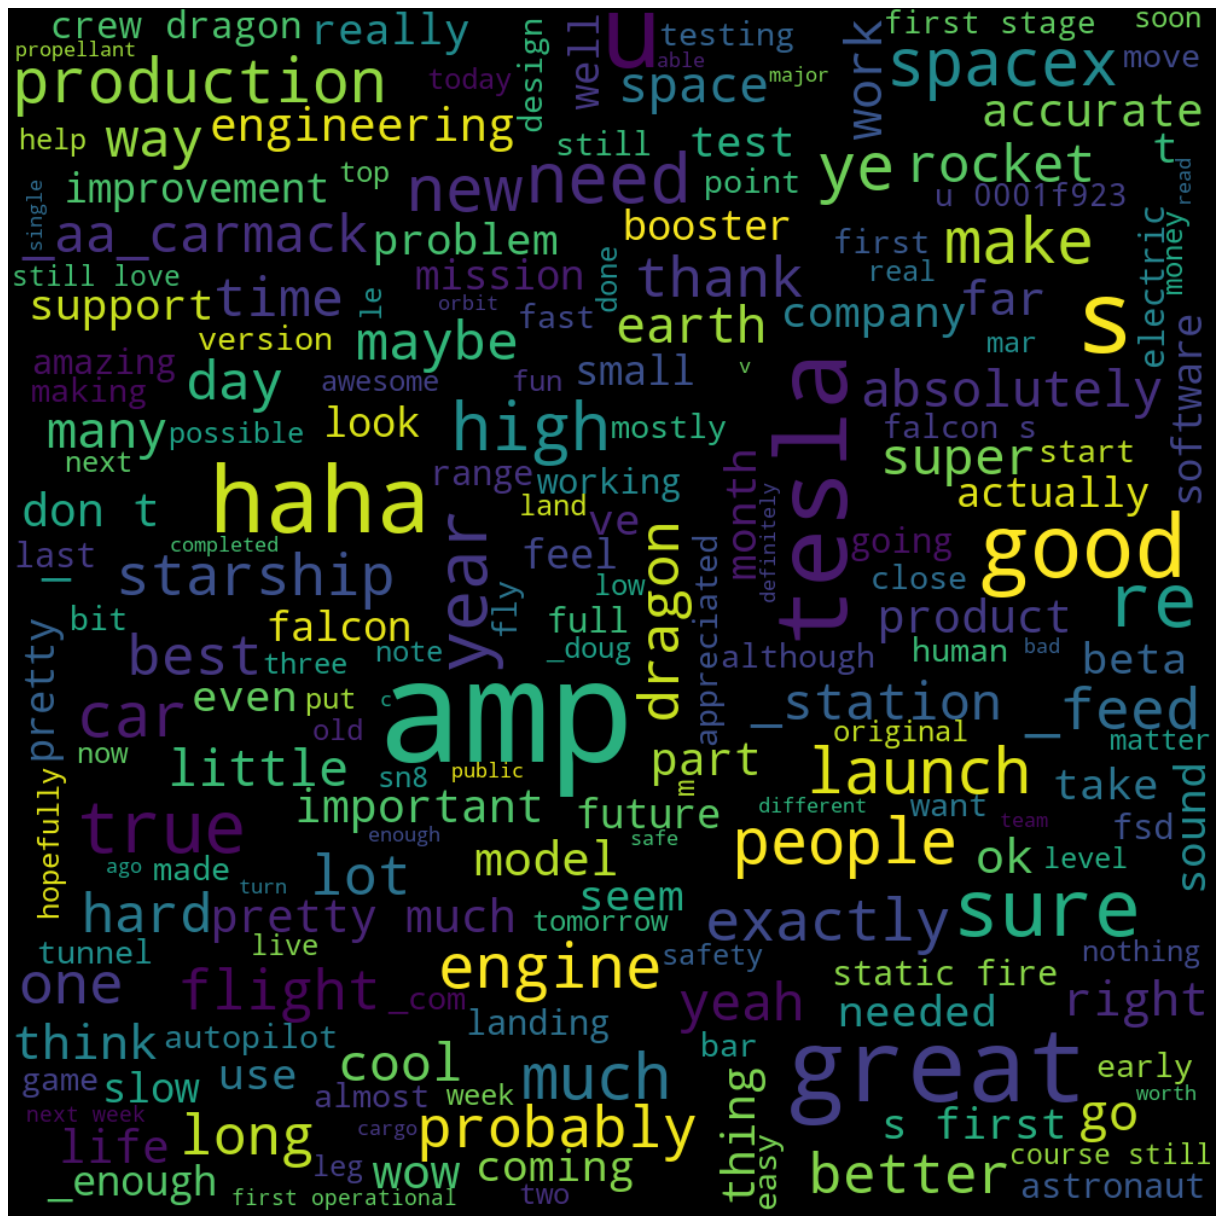

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

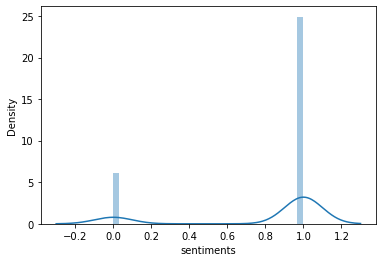

In [46]:
sns.distplot(processed_data['sentiments'])

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments'>

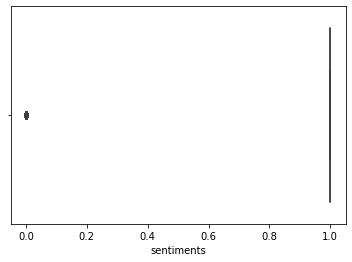

In [47]:
sns.boxplot(processed_data['sentiments'])

In [48]:
# Converting Words into Vectors

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [50]:
X_train = cv.transform(processed_data['tweets'])

In [51]:
print(X_train.shape)

(992, 13276)


In [52]:
X_train

<992x13276 sparse matrix of type '<class 'numpy.int64'>'
	with 17921 stored elements in Compressed Sparse Row format>

In [53]:
target = processed_data['sentiments'].values

In [54]:
target

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [55]:
# Sentiment Analysis (Model Building)

In [56]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [57]:
classifier.fit(X_train,target)

MultinomialNB()

In [58]:
test_Text,test_analysis = Clean_Text(test)

In [59]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [60]:
final_test_data

,tweets,sentiments
0,practical size constraint too. cant big fit e...,Positive
1,_ starlink staggeringly difficult technical &a...,Negative
2,_com generally try best patent,Positive
3,london beijing would cool,Positive
4,"tesla fsd beta limited release, fsd price (new...",Positive
...,...,...
106,try tesla &amp; youre welcome give back decid...,Positive
107,important service high latitude,Positive
108,"_ryan well, said many time price rise product ...",Positive
109,_aa_carmack int8 almost heavy lifting inferenc...,Positive


In [61]:
X_test = cv.transform(final_test_data['tweets'])

In [62]:
X_test

<111x13276 sparse matrix of type '<class 'numpy.int64'>'
	with 608 stored elements in Compressed Sparse Row format>

In [63]:
X_test.shape

(111, 13276)

In [64]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [65]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [66]:
final_test_data

,tweets,sentiments
0,practical size constraint too. cant big fit e...,1
1,_ starlink staggeringly difficult technical &a...,0
2,_com generally try best patent,1
3,london beijing would cool,1
4,"tesla fsd beta limited release, fsd price (new...",1
...,...,...
106,try tesla &amp; youre welcome give back decid...,1
107,important service high latitude,1
108,"_ryan well, said many time price rise product ...",1
109,_aa_carmack int8 almost heavy lifting inferenc...,1


In [67]:
actual_values = final_test_data['sentiments'].values

In [68]:
actual_values

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1])

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.7927927927927928
